Bo Yang (Aaron) USCID:7526922531

### INF 552 HOMEWORK_5  Date: 11-05-2019

## 1. Multi-class and Multi-Label Classification Using Support Vector Machines

## (a) Download the Anuran Calls (MFCCs) Data Set from: https://archive.ics.uci.edu/ml/datasets/Anuran+Calls+%28MFCCs%29. Choose 70% of the data randomly as the training set.

In [6]:
ROOT_PATH = ".\\assets"
SPLASH = "\\"
MFCC_FILE_PATH = "Frogs_MFCCs.csv"

In [5]:
import numpy as np

def load_data(file_path):
    """read records from csv file"""
    row_data = np.genfromtxt(file_path, dtype=None, delimiter=',', encoding='utf-8')[1:]
    X = np.array(row_data[:, :-4], dtype=float)
    y = np.array(row_data[:, row_data.shape[1] - 4: -1], dtype=str)
    return X, y

In [8]:
def train_test_split_by_ratio(X, y, test_size=0.3, random_state=None):
    """According to the test_size, split the row data into X_train, X_test, y_train, y_test"""
    assert X.shape[0] == y.shape[0], \
        "the size of X must be equal to the size of y"
    assert 0.0 <= test_size <= 1.0, \
        "test_size must be valid"

    if random_state:
        np.random.seed(random_state)

    shuffled_indexes = np.random.permutation(len(X))

    test_size = int(len(X) * test_size)
    test_indexes = shuffled_indexes[:test_size]
    train_indexes = shuffled_indexes[test_size:]

    X_train = X[train_indexes]
    y_train = y[train_indexes]

    X_test = X[test_indexes]
    y_test = y[test_indexes]

    return X_train, X_test, y_train, y_test

In [4]:
X_data, Y_data = load_data(ROOT_PATH + SPLASH + MFCC_FILE_PATH)
X_train, X_test, Y_train, Y_test = train_test_split_by_ratio(X_data, Y_data, 
                                                             test_size=0.3, random_state=2333)
print("X_train's shape: ", X_train.shape)
print("X_test's shape: ", X_test.shape)
print("Y_train's shape: ", Y_train.shape)
print("Y_test's shape: ", Y_test.shape)

X_train's shape:  (5037, 22)
X_test's shape:  (2158, 22)
Y_train's shape:  (5037, 3)
Y_test's shape:  (2158, 3)


## (b) Each instance has three labels: Families, Genus, and Species. Each of the labels has multiple classes. We wish to solve a multi-class and multi-label problem. One of the most important approaches to multi-class classification is to train a classifier for each label. We first try this approach:

### i. Research exact match and hamming score/ loss methods for evaluating multilabel classification and use them in evaluating the classifiers in this problem.

There is an API called metrics in sklearn package (https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics). And according to its introduction words, I can use metrics.accuracy_score(y_true, y_pred) to evaluate multilabel classification issues in an exact match way. And also it has metrics.hamming_loss(y_true, y_pred) which could be used to compute the average Hamming loss.

### ii. Train a SVM for each of the labels, using Gaussian kernels and one versus all classifiers. Determine the weight of the SVM penalty and the width of the Gaussian Kernel using 10 fold cross validation. You are welcome to try to solve the problem with both standardized and raw attributes and report the results.

In [1]:
from sklearn.metrics import accuracy_score, hamming_loss
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

def StandardSVC():
    return Pipeline([
        ("standardize", StandardScaler()),
        ("svc", SVC(kernel="rbf", decision_function_shape='ovr'))
    ])

In [2]:
LABELS_NAME = ["Family", "Genus", "Species"]
Y_LABEL = [['Leptodactylidae', 'Bufonidae', 'Dendrobatidae', 'Hylidae'],['Adenomera', 'Ameerega', 'Dendropsophus', 'Hypsiboas', 'Leptodactylus', 'Osteocephalus', 'Rhinella','Scinax'],['AdenomeraAndre', 'AdenomeraHylaedactylus', 'Ameeregatrivittata', 'HylaMinuta', 'HypsiboasCinerascens','HypsiboasCordobae', 'LeptodactylusFuscus', 'OsteocephalusOophagus', 'Rhinellagranulosa','ScinaxRuber']]
MODEL_NAMES = ['Chain 1', 'Chain 2', 'Chain 3', 'Chain 4', 'Chain 5', 'Chain 6', 'Chain 7', 'Chain 8', 'Chain 9','Chain 10', 'Ensemble']

In [7]:
SVCParameters = {"gamma": np.logspace(-9, 3, 10), "C": np.logspace(-2, 5, 10)}
stdSVCParameters = {"svc__gamma": np.logspace(-9, 3, 10), "svc__C": np.logspace(-2, 5, 10)}

for label_index in range(Y_train.shape[1]):
    y_train = Y_train[:, label_index]
    y_test = Y_test[:, label_index]

    svc = SVC(kernel="rbf", decision_function_shape='ovr')
    stdSVC = StandardSVC()
    gridCV = GridSearchCV(svc, SVCParameters, cv=10, n_jobs=-1)
    stdGridCV = GridSearchCV(stdSVC, stdSVCParameters, cv=10, n_jobs=-1)

    gridCV.fit(X_train, y_train)
    stdGridCV.fit(X_train, y_train)

    bestClf = gridCV.best_estimator_
    bestStdClf = stdGridCV.best_estimator_

    y_predict = bestClf.predict(X_test)
    y_std_predict = bestStdClf.predict(StandardScaler().fit(X_test).transform(X_test))

    print("-------------------------" + LABELS_NAME[label_index] + "---------------------------")
    print("Using RawData, The best params are: ", gridCV.best_params_)
    print("Using Standardized Data, The best params are: ", 
          stdGridCV.best_params_)

    print("Using RawData, The accuracy score is: ", accuracy_score(y_test, y_predict))
    print("Using Standardized Data, The accuracy sco re is: ", 
          accuracy_score(y_test, y_std_predict))

    print("Using RawData, The hamming loss is: ", hamming_loss(y_test, y_predict))
    print("Using Standardized Data, The hamming loss is: ", 
          hamming_loss(y_test, y_std_predict))

-------------------------Family---------------------------
Using RawData, The best params are:  {'C': 12.91549665014884, 'gamma': 2.154434690031878}
Using Standardized Data, The best params are:  {'svc__C': 2.1544346900318843, 'svc__gamma': 0.1}
Using RawData, The accuracy score is:  0.9902687673772012
Using Standardized Data, The accuracy sco re is:  0.30213160333642264
Using RawData, The hamming loss is:  0.009731232622798888
Using Standardized Data, The hamming loss is:  0.6978683966635774
-------------------------Genus---------------------------
Using RawData, The best params are:  {'C': 12.91549665014884, 'gamma': 2.154434690031878}
Using Standardized Data, The best params are:  {'svc__C': 464.1588833612782, 'svc__gamma': 0.004641588833612773}
Using RawData, The accuracy score is:  0.9874884151992586
Using Standardized Data, The accuracy sco re is:  0.5755329008341057
Using RawData, The hamming loss is:  0.012511584800741427
Using Standardized Data, The hamming loss is:  0.4244670

### iii. Repeat 1(b)ii with L1-penalized SVMs. Remember to standardize the attributes. Determine the weight of the SVM penalty using 10 fold cross validation

In [3]:
from sklearn.svm import LinearSVC
import warnings

warnings.filterwarnings("ignore")

def linearStdSVC():
    return Pipeline([
        ("standardize", StandardScaler()),
        ("svc", LinearSVC(penalty="l1", multi_class='ovr', dual=False))
    ])

In [9]:
parameters = {"svc__tol": [1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8], "svc__C": np.logspace(-2, 5, 10)}

for label_index in range(Y_train.shape[1]):
    y_train = Y_train[:, label_index]
    y_test = Y_test[:, label_index]
    ls_scv = linearStdSVC()
    gridCV = GridSearchCV(ls_scv, parameters, cv=10, n_jobs=-1)
    gridCV.fit(X_train, y_train)

    bestClf = gridCV.best_estimator_
    y_predict = bestClf.predict(StandardScaler().fit(X_test).transform(X_test))

    print("-------------------------" + LABELS_NAME[label_index] + "---------------------------")
    print("Using L1 penalized SVM, The best params are: ", gridCV.best_params_)

    print("Using L1 penalized SVM, The accuracy score is: ", accuracy_score(y_test, y_predict))

    print("Using L1 penalized SVM, The hamming loss is: ", hamming_loss(y_test, y_predict))

-------------------------Family---------------------------
Using L1 penalized SVM, The best params are:  {'svc__C': 0.35938136638046275, 'svc__tol': 1e-07}
Using L1 penalized SVM, The accuracy score is:  0.8188137164040779
Using L1 penalized SVM, The hamming loss is:  0.18118628359592215
-------------------------Genus---------------------------
Using L1 penalized SVM, The best params are:  {'svc__C': 464.1588833612782, 'svc__tol': 0.001}
Using L1 penalized SVM, The accuracy score is:  0.7034291010194624
Using L1 penalized SVM, The hamming loss is:  0.2965708989805375
-------------------------Species---------------------------
Using L1 penalized SVM, The best params are:  {'svc__C': 2.1544346900318843, 'svc__tol': 0.001}
Using L1 penalized SVM, The accuracy score is:  0.8498609823911029
Using L1 penalized SVM, The hamming loss is:  0.15013901760889714


### iv. Repeat 1(b)iii by using SMOTE or any other method you know to remedy class imbalance. Report your conclusions about the classifiers you trained.

In [11]:
from imblearn.over_sampling import SMOTE

for label_index in range(Y_train.shape[1]):
    y_train = Y_train[:, label_index]
    y_test = Y_test[:, label_index]

    smote = SMOTE(random_state=2333)
    X_train_smote, y_train_smote = smote.fit_sample(X_train, y_train)
    X_test_smote, y_test_smote = smote.fit_sample(X_test, y_test)

    ls_scv = linearStdSVC()
    gridCV = GridSearchCV(ls_scv, parameters, cv=10, n_jobs=-1)
    gridCV.fit(X_train_smote, y_train_smote)

    bestClf = gridCV.best_estimator_
    y_predict = bestClf.predict(X_test_smote)

    print("-------------------------" + LABELS_NAME[label_index] + "---------------------------")
    print("Using RawData, The best params are: ", gridCV.best_params_)

    print("Using RawData, The accuracy score is: ", accuracy_score(y_test_smote, y_predict))

    print("Using RawData, The hamming loss is: ", hamming_loss(y_test_smote, y_predict))

Using TensorFlow backend.


-------------------------Family---------------------------
Using RawData, The best params are:  {'svc__C': 2.1544346900318843, 'svc__tol': 1e-06}
Using RawData, The accuracy score is:  0.9325037707390649
Using RawData, The hamming loss is:  0.06749622926093514
-------------------------Genus---------------------------
Using RawData, The best params are:  {'svc__C': 77.4263682681127, 'svc__tol': 0.0001}
Using RawData, The accuracy score is:  0.929549114331723
Using RawData, The hamming loss is:  0.07045088566827697
-------------------------Species---------------------------
Using RawData, The best params are:  {'svc__C': 77.4263682681127, 'svc__tol': 0.0001}
Using RawData, The accuracy score is:  0.9398854961832062
Using RawData, The hamming loss is:  0.060114503816793896


### v. Extra Practice: Study the Classifier Chain method and apply it to the above problem

In [14]:
from sklearn.metrics import jaccard_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

def plot_grouped_bar(y_values, x_labels, legend_labels):
    colors = ['#EE5A24', '#009432', '#0652DD']
    x_pos = np.arange(len(x_labels))
    width = 0.25
    fig, ax = plt.subplots(figsize=(7, 4))
    for index in range(3):
        ax.bar(x_pos - width * index, y_values[index], alpha=0.5, 
               color=colors[index], width=width, label=legend_labels[index])

    ax.grid(True)
    ax.set_title('Classifier Chain Ensemble Performance Comparison')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(x_labels, rotation='vertical')
    ax.set_ylabel('Jaccard Similarity Score')
    plt.legend()
    plt.tight_layout()
    plt.show()

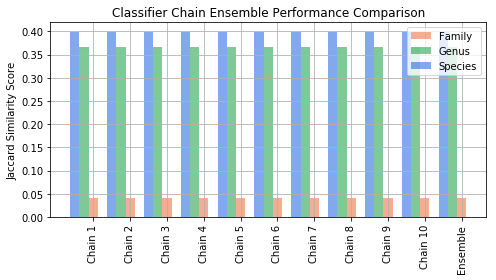

In [15]:
from sklearn.multioutput import ClassifierChain

X_data, Y_data = load_data(ROOT_PATH + SPLASH + MFCC_FILE_PATH)
X_train, X_test, Y_train, Y_test = train_test_split_by_ratio(X_data, Y_data, 
                                                             test_size=0.3, random_state=2333)

parameters = {"svc__tol": [1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8], 
              "svc__C": np.logspace(-2, 5, 10)}
X_test = StandardScaler().fit(X_test).transform(X_test)

model_scores = []

for label_index in range(Y_train.shape[1]):
    y_train = Y_train[:, label_index]
    y_test = Y_test[:, label_index]

    labelEncoder = LabelEncoder().fit(Y_LABEL[label_index])
    y_train = labelEncoder.transform(y_train)
    y_test = labelEncoder.transform(y_test)

    ls_scv = linearStdSVC()
    gridCV = GridSearchCV(ls_scv, parameters, cv=10, n_jobs=-1)
    gridCV.fit(X_train, y_train)
    chains = [ClassifierChain(gridCV.best_estimator_, order='random', random_state=2333) 
              for i in range(10)]

    for classifier in chains:
        classifier.fit(X_train, y_train.reshape(-1, 1))

    #  Citiation
    # ----------------------------------------------------------
    # the following idea about using jaccard_score is come from
    # https://scikit-learn.org/stable/auto_examples/multioutput/plot_classifier_chain_yeast.html
    # but I choose different way to average the score and plot it in my way
    y_pred_chains = np.array([classifier.predict(X_test) for classifier in chains])

    chain_jaccard_scores = [jaccard_score(y_test.reshape(-1, 1), y_pred_chain >= .5, 
                                          average='micro') for y_pred_chain in y_pred_chains]

    y_pred_ensemble = y_pred_chains.mean(axis=0)
    ensemble_jaccard_score = jaccard_score(y_test, y_pred_ensemble >= .5, average='micro')

    chain_jaccard_scores.append(ensemble_jaccard_score)
    model_scores.append(chain_jaccard_scores)

plot_grouped_bar(model_scores, MODEL_NAMES, LABELS_NAME)

I also tried to fit the classifier chain by full Y_data (3 labels in total) rather than a single label. But I didn't find any difference. the only reason to cause the fluctuation is that the setting of random_state.

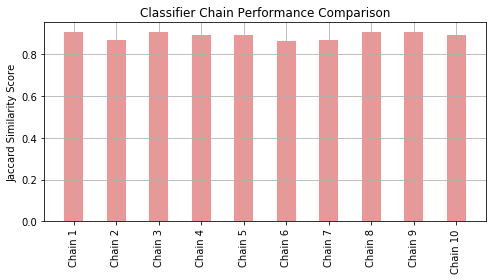

In [10]:
import pandas as pd
from sklearn.multioutput import ClassifierChain
from sklearn.metrics import jaccard_score
import matplotlib.pyplot as plt
import numpy as np

def encodeYData(Y_data):
    x = Y_data.shape[0]
    y = Y_data.shape[1]
    flattenedData = np.array(Y_data.reshape(-1, ).tolist())
    mapResult = pd.factorize(flattenedData)
    return np.array(mapResult[0]).reshape(x, y)

X_data, Y_data = load_data(ROOT_PATH + SPLASH + MFCC_FILE_PATH)
Y_data = encodeYData(Y_data)
X_train, X_test, Y_train, Y_test = train_test_split_by_ratio(X_data, Y_data, 
                                                             test_size=0.3, random_state=2333)

chains = [ClassifierChain(linearStdSVC(), order='random', random_state=i) for i in range(10)]
for classifier in chains:
    classifier.fit(X_train, Y_train)

y_pred_chains = np.array([classifier.predict(X_test) for classifier in chains])

chain_jaccard_scores = [jaccard_score(Y_test.reshape(-1, 1), y_pred_chain.reshape(-1, 1), 
                                      average='micro') for y_pred_chain in y_pred_chains]

fig, ax = plt.subplots(figsize=(7, 4))

ax.bar(np.arange(len(MODEL_NAMES) - 1), chain_jaccard_scores, alpha=0.5, 
       color='#d63031', width=0.45)

ax.grid(True)
ax.set_title('Classifier Chain Performance Comparison')
ax.set_xticks(np.arange(len(MODEL_NAMES) - 1))
ax.set_xticklabels(MODEL_NAMES[:-1], rotation='vertical')
ax.set_ylabel('Jaccard Similarity Score')
plt.tight_layout()
plt.show()

Also, you can find that these two figures are pretty the same. the first plot show three labels value respectively. the second just simply add them together. So process label separately or group them together, it doesn't matter in this issue.

### vi. Extra Practice: Research how confusion matrices, precision, recall, ROC, and AUC are defined for multi-label classification and compute them for the classifiers you trained in above

In [16]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.multiclass import OneVsRestClassifier
import itertools


#  Citiation
# ----------------------------------------------------------
# the idea of this method plotting confusion matrix comes from
# https://stackoverflow.com/questions/39033880/plot-confusion-matrix-sklearn-with-multiple-labels
# I simplify this method a little bit and add some like precision, recall etc features on it
def plot_confusion_matrix(y_true, y_pred, target_names, title=None):
    confusionMatrix = confusion_matrix(y_true, y_pred)
    precision, recall, _, _ = score(y_true, y_pred, average='macro')

    plt.figure(figsize=(8, 6))
    plt.imshow(confusionMatrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=88)
        plt.yticks(tick_marks, target_names)

    thresh = confusionMatrix.max() / 2
    for i, j in itertools.product(range(confusionMatrix.shape[0]),range(confusionMatrix.shape[1])):
        plt.text(j, i, "{:,}".format(confusionMatrix[i, j]),
                 horizontalalignment="center",
                 color="white" if confusionMatrix[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\nOverall Precision={:0.4f}; '
               'Overall Recall={:0.4f}'.format(precision, recall))
    plt.title(title)
    plt.show()

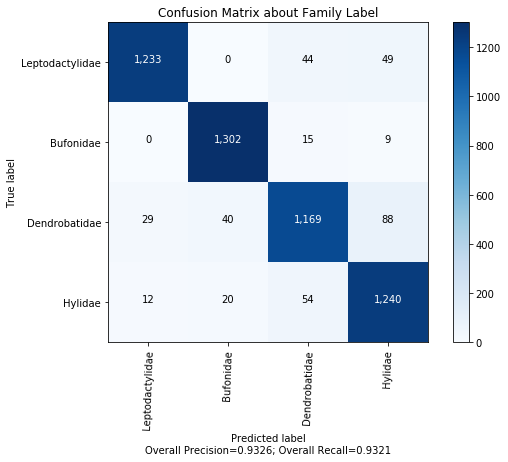

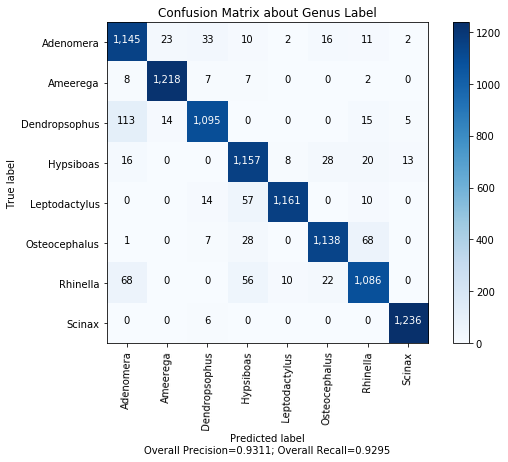

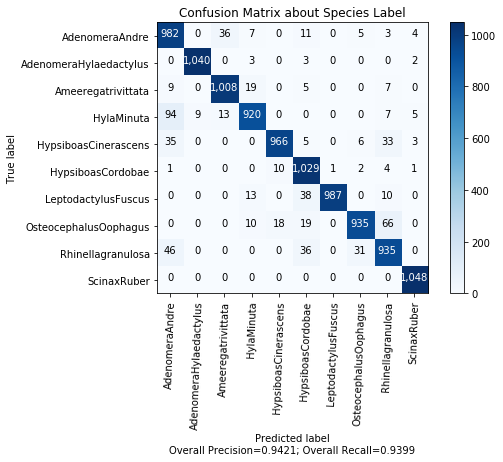

In [17]:
X_data, Y_data = load_data(ROOT_PATH + SPLASH + MFCC_FILE_PATH)
X_train, X_test, Y_train, Y_test = train_test_split_by_ratio(X_data, Y_data, 
                                                             test_size=0.3, random_state=2333)

parameters = {"svc__tol": [1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8], "svc__C": np.logspace(-2, 5, 10)}
for label_index in range(Y_train.shape[1]):
    y_train = Y_train[:, label_index]
    y_test = Y_test[:, label_index]

    smote = SMOTE(random_state=2333)
    X_train_smote, y_train_smote = smote.fit_sample(X_train, y_train)
    X_test_smote, y_test_smote = smote.fit_sample(X_test, y_test)

    ls_scv = linearStdSVC()
    gridCV = GridSearchCV(ls_scv, parameters, cv=10, n_jobs=-1)
    gridCV.fit(X_train_smote, y_train_smote)

    bestClf = gridCV.best_estimator_
    y_predict = bestClf.predict(X_test_smote)

    plot_confusion_matrix(y_test_smote, y_predict, target_names=Y_LABEL[label_index],
                          title='Confusion Matrix about {} Label'.format(LABELS_NAME[label_index]))

In [20]:
#  Citiation
# ----------------------------------------------------------
# the idea of this method plotting multi-class roc curve comes from
# https://stackoverflow.com/questions/33547965/
# computing-auc-and-roc-curve-from-multi-class-data-in-scikit-learn-sklearn
def plot_roc_curve(y_test, y_score, target_names, title):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(target_names)):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    colors = ['#ffa502', '#16a085', '#ff4757', '#747d8c', 
              '#5352ed', '#2ed573', '#c0392b', '#8e44ad']
    for i, color in zip(range(len(target_names)), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=1,
                 label='ROC of class {0} (area = {1:0.2f})'
                       ''.format(target_names[i], roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

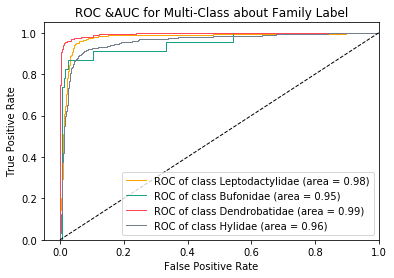

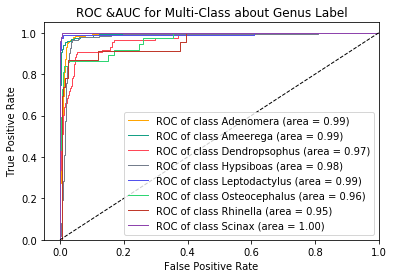

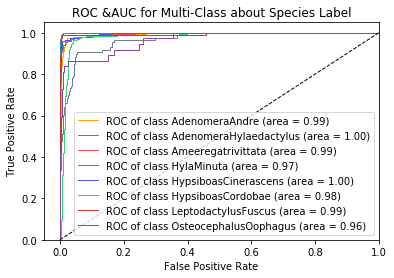

In [21]:
Cs = [2.1544, 77.4263, 77.4263]
tols = [1e-6, 0.0001, 0.0001]
for label_index in range(Y_train.shape[1]):
    y_train = Y_train[:, label_index]
    y_test = Y_test[:, label_index]

    y_train = label_binarize(y_train, classes=Y_LABEL[label_index])
    y_test = label_binarize(y_test, classes=Y_LABEL[label_index])

    classifier = OneVsRestClassifier(
        LinearSVC(penalty="l1", multi_class='ovr', dual=False, 
                  tol=tols[label_index], C=Cs[label_index]))
    y_score = classifier.fit(X_train, y_train).decision_function(X_test)

    plot_roc_curve(y_test, y_score, target_names=Y_LABEL[label_index],
                   title='ROC &AUC for Multi-Class about {} Label'
                   .format(LABELS_NAME[label_index]))

## 2. K-Means Clustering on a Multi-Class and Multi-Label Data Set

### Monte-Carlo Simulation: Perform the following procedures 50 times, and report the average and standard deviation of the 50 Hamming Distances that you calculate.

### (a) Use k-means clustering on the whole Anuran Calls (MFCCs) Data Set (do not split the data into train and test, as we are not performing supervised learning in this exercise). Choose k ∈ {1,2,...,50} automatically based on one of the methods provided in the slides (CH or Gap Statistics or scree plots or Silhouettes) or any other method you know.

In [12]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

X_train, _ = load_data(ROOT_PATH + SPLASH + MFCC_FILE_PATH)

avg_scores = []
hamming_dist = []
k_list = []
for i in range(50):
    temp_avg_scores = []
    for k in range(2, 51):
        k_means_clf = KMeans(n_clusters=k, random_state=i)
        cluster_labels = k_means_clf.fit_predict(X_train)
        temp_avg_scores.append(silhouette_score(X_train, cluster_labels))
        hamming_dist.append(
            sum(np.min(cdist(X_train, k_means_clf.cluster_centers_, 'euclidean'), 
                       axis=1)) / X_train.shape[0])

    temp_best_k = temp_avg_scores.index(max(temp_avg_scores)) + 2
    k_list.append(temp_best_k)
    avg_scores.append(max(temp_avg_scores))

print("-----------\"The best K\"-------------")
print("The Best K is : ", Counter(k_list).most_common(1)[0][0])
print("-----------\"Max Silhouette Score\"-------------")
print("Max Silhouette Score is : ", max(avg_scores))
print("-----------\"AVG Hamming Distance\"-------------")
print("The average of Hamming Distance is : ", np.average(hamming_dist))
print("-----------\"STD Hamming Distance\"-------------")
print("The standard deviation of Hamming Distance is : ", np.std(hamming_dist))

-----------"The best K"-------------
The Best K is :  4
-----------"Max Silhouette Score"-------------
Max Silhouette Score is :  0.3788851472047738
-----------"AVG Hamming Distance"-------------
The average of Hamming Distance is :  0.4172737392617818
-----------"STD Hamming Distance"-------------
The standard deviation of Hamming Distance is :  0.05624219269604585


### (b) In each cluster, determine which family is the majority by reading the true labels. Repeat for genus and species.

In [13]:
import pandas as pd
from collections import Counter

PREDICT_LABEL = 'predicted'

X_train, y_data = load_data(ROOT_PATH + SPLASH + MFCC_FILE_PATH)
y_data = pd.DataFrame(y_data, columns=LABELS_NAME)

avg_scores = []
for i in range(1, 51):
    temp_avg_scores = []
    predicted_results = []
    for k in range(2, 5):
        k_means_clf = KMeans(n_clusters=k, random_state=i)
        predicted_labels = k_means_clf.fit_predict(X_train)
        predicted_results.append(predicted_labels)
        temp_avg_scores.append(silhouette_score(X_train, predicted_labels))

    temp_best_k = temp_avg_scores.index(max(temp_avg_scores)) + 2
    majority_label = dict()
    y_data[PREDICT_LABEL] = predicted_results[np.argmax(temp_avg_scores)]

    for class_index in range(temp_best_k):
        matched_label_data = y_data[y_data[PREDICT_LABEL] == class_index]
        temp = {}
        for column in LABELS_NAME:
            temp[column] = Counter(matched_label_data[column]).most_common(1)[0][0]
        majority_label[class_index] = temp

    print("in {} th loop, the best k is {}, and the majority class in each label is : {}"
          .format(i, temp_best_k, majority_label))

in 1 th loop, the best k is 4, and the majority class in each label is : {0: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCinerascens'}, 1: {'Family': 'Dendrobatidae', 'Genus': 'Ameerega', 'Species': 'Ameeregatrivittata'}, 2: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraHylaedactylus'}, 3: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}}
in 2 th loop, the best k is 4, and the majority class in each label is : {0: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}, 1: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraHylaedactylus'}, 2: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}, 3: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraAndre'}}
in 3 th loop, the best k is 4, and the majority class in each label is : {0: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}, 1: {'Family': 'Hyl

in 21 th loop, the best k is 4, and the majority class in each label is : {0: {'Family': 'Dendrobatidae', 'Genus': 'Ameerega', 'Species': 'Ameeregatrivittata'}, 1: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}, 2: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraHylaedactylus'}, 3: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCinerascens'}}
in 22 th loop, the best k is 4, and the majority class in each label is : {0: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraHylaedactylus'}, 1: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCinerascens'}, 2: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}, 3: {'Family': 'Dendrobatidae', 'Genus': 'Ameerega', 'Species': 'Ameeregatrivittata'}}
in 23 th loop, the best k is 4, and the majority class in each label is : {0: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraHylaedactylus'}

in 41 th loop, the best k is 4, and the majority class in each label is : {0: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraHylaedactylus'}, 1: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}, 2: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCinerascens'}, 3: {'Family': 'Dendrobatidae', 'Genus': 'Ameerega', 'Species': 'Ameeregatrivittata'}}
in 42 th loop, the best k is 4, and the majority class in each label is : {0: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraHylaedactylus'}, 1: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}, 2: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCinerascens'}, 3: {'Family': 'Dendrobatidae', 'Genus': 'Ameerega', 'Species': 'Ameeregatrivittata'}}
in 43 th loop, the best k is 4, and the majority class in each label is : {0: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraHylaedactylus'}

### (c) Now for each cluster you have a majority label triplet (family, genus, species). Calculate the average Hamming distance, Hamming score, and Hamming loss5 between the true labels and the labels assigned by clusters.

In [15]:
X_train, y_data = load_data(ROOT_PATH + SPLASH + MFCC_FILE_PATH)
y_data = pd.DataFrame(y_data, columns=LABELS_NAME)
hamming_loss_list = list()
hamming_dist = list()
avg_scores = []
for i in range(1, 51):
    temp_avg_scores = []
    predicted_results = []
    for k in range(2, 10):
        k_means_clf = KMeans(n_clusters=k, random_state=i)
        predicted_labels = k_means_clf.fit_predict(X_train)
        predicted_results.append(predicted_labels)
        temp_avg_scores.append(silhouette_score(X_train, predicted_labels))
        hamming_dist.append(
            sum(np.min(cdist(X_train, k_means_clf.cluster_centers_, 'euclidean'), 
                       axis=1)) / X_train.shape[0])

    temp_best_k = temp_avg_scores.index(max(temp_avg_scores)) + 2
    majority_label = dict()
    y_data[PREDICT_LABEL] = predicted_results[np.argmax(temp_avg_scores)]

    for class_index in range(temp_best_k):
        matched_label_data = y_data[y_data[PREDICT_LABEL] == class_index]
        temp = {}
        for column in LABELS_NAME:
            temp[column] = Counter(matched_label_data[column]).most_common(1)[0][0]
        majority_label[class_index] = temp

    unmatched = 0
    for class_index in range(temp_best_k):
        matched_label_data = y_data[y_data[PREDICT_LABEL] == class_index]
        for column in LABELS_NAME:
            unmatched += sum(matched_label_data[column] != majority_label[class_index][column])
    hamming_loss = unmatched / (y_data.shape[0] * 3)
    hamming_loss_list.append(hamming_loss)

print("-----------\"AVG Hamming Distance\"-------------")
print("The average of Hamming Distance is : ", np.average(hamming_dist))
print("-----------\"AVG Hamming Score\"-------------")
print("The average of Hamming Score is : ", np.average(1 - np.array(hamming_loss_list)))
print("-----------\"AVG Hamming Loss\"-------------")
print("The average of Hamming Loss is : ", np.average(hamming_loss_list))

-----------"AVG Hamming Distance"-------------
The average of Hamming Distance is :  0.4638153690257796
-----------"AVG Hamming Score"-------------
The average of Hamming Score is :  0.8330553625202686
-----------"AVG Hamming Loss"-------------
The average of Hamming Loss is :  0.16694463747973132


## 3. ISLR 10.7.2

### Suppose that we have four observations, for which we compute a dissimilarity matrix, given by

![WeChat Screenshot_20191031153718](https://user-images.githubusercontent.com/24391143/67990847-6238ea80-fbf4-11e9-9cc0-1e5e9845064b.png)

### For instance, the dissimilarity between the first and second observations is 0.3, and the dissimilarity between the second and fourth observations is 0.8.

#### (a) On the basis of this dissimilarity matrix, sketch the dendrogram that results from hierarchically clustering these four observations using complete linkage. Be sure to indicate on the plot the height at which each fusion occurs, as well as the observations corresponding to each leaf in the dendrogram.

F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


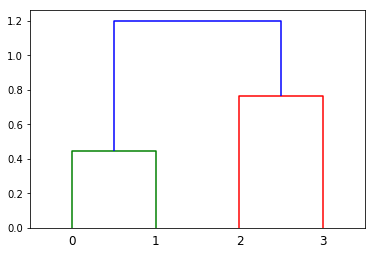

In [13]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

ytdist = np.array([[0, 0.3, 0.4, 0.7], 
                   [0.3, 0, 0.5, 0.8], 
                   [0.4, 0.5, 0, 0.45], 
                   [0.7, 0.8, 0.45, 0]])
Z = hierarchy.linkage(ytdist, 'complete')
plt.figure()
dn = hierarchy.dendrogram(Z)

#### (b) Repeat (a), this time using single linkage clustering

F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


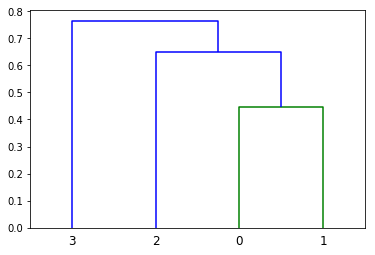

In [14]:
Z = hierarchy.linkage(ytdist, 'single')
plt.figure()
dn = hierarchy.dendrogram(Z)

#### (c) Suppose that we cut the dendogram obtained in (a) such that two clusters result. Which observations are in each cluster?

first cluster has 0 and 1. the second has 2 and 3

#### (d) Suppose that we cut the dendogram obtained in (b) such that two clusters result. Which observations are in each cluster?

first cluster has 3. the second has 2 and 0 and 1

#### (e) It is mentioned in the chapter that at each fusion in the dendrogram, the position of the two clusters being fused can be swapped without changing the meaning of the dendrogram. Draw a dendrogram that is equivalent to the dendrogram in (a), for which two or more of the leaves are repositioned, but for which the meaning of the dendrogram is the same.

F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


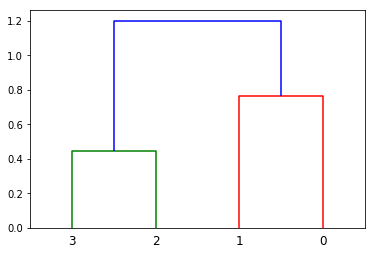

In [15]:
Z = hierarchy.linkage(ytdist, 'complete')
plt.figure()
dn = hierarchy.dendrogram(Z, labels=[3,2,1,0])

## 4. Extra Practice: The rest of problems in 10.7

### 1. This problem involves the K-means clustering algorithm.
    -(a) Prove(10.12)

![WeChat Screenshot_20191103213258](https://user-images.githubusercontent.com/24391143/68101265-96750b00-fe81-11e9-85cd-a13e1cfc7a5c.png)

![SS](https://user-images.githubusercontent.com/24391143/68239604-1dc89880-ffc0-11e9-98e1-5d6d3166e1ba.jpg)

    -(b) On the basis of this identity, argue that the K-means clustering algorithm (Algorithm 10.1) decrease the objective (10.11) at each iteration.

![WeChat Screenshot_20191105113638](https://user-images.githubusercontent.com/24391143/68239826-916aa580-ffc0-11e9-96ca-f3b80f553c9a.png)

Since K-means assign the data points to a cluster in which their distance is lowest. So after each iteration, the distance of data set from the centroid is decreasing. 

### 3. In this problem, you will perform K-means clustering manually, with K = 2, on a small example with n = 6 observations and p = 2 features. The observations are as follows.

![WeChat Screenshot_20191103213501](https://user-images.githubusercontent.com/24391143/68101313-cf14e480-fe81-11e9-95bc-5264b9c807c1.png)

#### (a) Plot the observations.

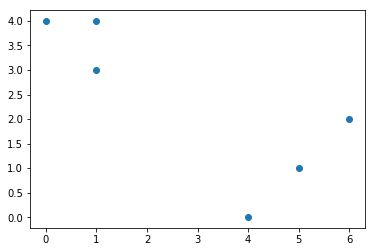

In [2]:
import matplotlib.pyplot as plt
import numpy as np

x1 = np.array([1,1,0,5,6,4])
x2 = np.array([4,3,4,1,2,0])
plt.scatter(x1, x2, marker='o')

#### (b) Randomly assign a cluster label to each observation. You can use the sample() command in R to do this. Report the cluster labels for each observation.

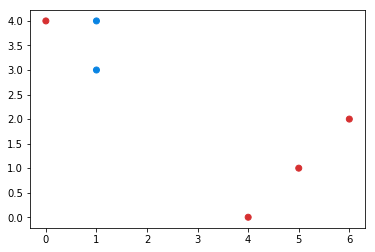

In [15]:
np.random.seed(2333)
labels = np.random.randint(2, size=6)
colors = ['#d63031' if label == 1 else '#0984e3' for label in labels]
plt.scatter(x1, x2, marker='o', color=colors)

#### (c) Compute the centroid for each cluster.

for the data with blue label: <br>
    $$\bar{x_{11}} = (1 + 1) / 2 = 1$$
    $$\bar{x_{12}} = (4 + 3) / 2 = 3.5$$
for the data with red label: <br>
    $$\bar{x_{21}} = (0 + 4 + 5 + 6) / 4 = 3.75$$
    $$\bar{x_{22}} = (4 + 0 + 1 + 2) / 4 = 1.75$$

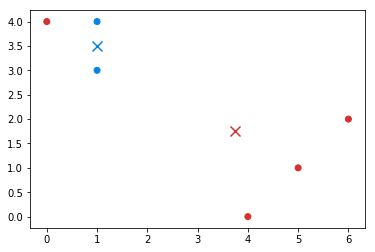

In [30]:
x1_blue_bar = np.mean(x1[labels == 0])
x1_red_bar = np.mean(x1[labels == 1])
x2_blue_bar = np.mean(x2[labels == 0])
x2_red_bar = np.mean(x2[labels == 1])

plt.scatter(x1_blue_bar, x2_blue_bar, s=100, marker='x',color='#0984e3')
plt.scatter(x1_red_bar, x2_red_bar, s=100, marker='x',color='#d63031')
plt.scatter(x1, x2, marker='o', color=colors)

#### (d) Assign each observation to the centroid to which it is closest, in terms of Euclidean distance. Report the cluster labels for each observation.

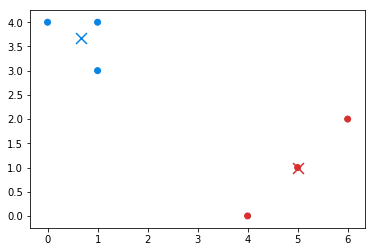

In [37]:
labels = np.array([0,0,0,1,1,1])
colors = ['#d63031' if label == 1 else '#0984e3' for label in labels]
x1_blue_bar = np.mean(x1[labels == 0])
x1_red_bar = np.mean(x1[labels == 1])
x2_blue_bar = np.mean(x2[labels == 0])
x2_red_bar = np.mean(x2[labels == 1])

plt.scatter(x1_blue_bar, x2_blue_bar, s=120, marker='x',color='#0984e3')
plt.scatter(x1_red_bar, x2_red_bar, s=120, marker='x',color='#d63031')
plt.scatter(x1, x2, marker='o', color=colors)

#### (e) Repeat (c) and (d) until the answers obtained stop changing.

#### (f) In your plot from (a), color the observations according to the cluster labels obtained.

for the data with blue label: <br>
    $$\bar{x_{11}} = (0 + 1 + 1) / 3 = 0.666$$
    $$\bar{x_{12}} = (3 + 4 + 3) / 3 = 3.666$$
for the data with red label: <br>
    $$\bar{x_{21}} = (4 + 5 + 6) / 3 = 5$$
    $$\bar{x_{22}} = (0 + 1 + 2) / 3 = 1$$